**Import Packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score


**Read in Raw Data**

In [3]:
# This is what we'll need to work with!
df_train = pd.read_csv('../data/train.csv')

# We won't touch this until after we've created model
df_test = pd.read_csv('../data/test.csv')

In [4]:
# check the shape of df_train
df_train.shape

(2051, 81)

In [5]:
# check the shape of df_test
df_test.shape

(878, 80)

In [6]:
# Quick check to see which column is in train.csv but not test.csv
for col in df_train.columns:
    if col in df_test.columns:
        pass
    else:
        print(col)

SalePrice


In [7]:
# Check the train and test dataframes
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [8]:
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


# Exploratory Data Analysis

## Explore training data

### Missing values

In [9]:
# Set the index for our dataframe according to the ID column
df_train.set_index('Id', inplace=True)

In [10]:
# Check the id is set as index
df_train.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [11]:
# get a list of the columns that contain null values
df_train.columns[df_train.isnull().any()].tolist()

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

In [12]:
# How many missing values are in each column?
nan_columns = df_train[['Lot Frontage','Alley','Mas Vnr Type','Mas Vnr Area','Bsmt Qual',
 'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin SF 1','BsmtFin Type 2','BsmtFin SF 2',
 'Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath','Fireplace Qu','Garage Type',
 'Garage Yr Blt','Garage Finish','Garage Cars','Garage Area','Garage Qual','Garage Cond','Pool QC',
 'Fence','Misc Feature']].isnull().sum()
nan_columns

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [12]:
# What percent of each column are missing?
nan_columns * 100 / len(df_train)

Lot Frontage      16.089712
Alley             93.174061
Mas Vnr Type       1.072647
Mas Vnr Area       1.072647
Bsmt Qual          2.681619
Bsmt Cond          2.681619
Bsmt Exposure      2.827889
BsmtFin Type 1     2.681619
BsmtFin SF 1       0.048757
BsmtFin Type 2     2.730375
BsmtFin SF 2       0.048757
Bsmt Unf SF        0.048757
Total Bsmt SF      0.048757
Bsmt Full Bath     0.097513
Bsmt Half Bath     0.097513
Fireplace Qu      48.756704
Garage Type        5.509508
Garage Yr Blt      5.558264
Garage Finish      5.558264
Garage Cars        0.048757
Garage Area        0.048757
Garage Qual        5.558264
Garage Cond        5.558264
Pool QC           99.561190
Fence             80.497318
Misc Feature      96.830814
dtype: float64

In [13]:
# Since there are many NaN values for 'Misc Feature', check if the neighboring column 'Misc Val' is 0. 
# This column is also lacking about 96% of the data
df_train['Misc Val'].value_counts(normalize=True)

0        0.968308
400      0.005851
500      0.003901
600      0.002925
2000     0.002438
450      0.002438
700      0.001950
2500     0.000975
4500     0.000975
3000     0.000975
1200     0.000975
80       0.000488
8300     0.000488
12500    0.000488
460      0.000488
300      0.000488
54       0.000488
3500     0.000488
480      0.000488
650      0.000488
800      0.000488
900      0.000488
1150     0.000488
1300     0.000488
1500     0.000488
6500     0.000488
455      0.000488
17000    0.000488
Name: Misc Val, dtype: float64

In [14]:
# Identify why there are so many NaN values in this column
df_train['Pool QC'].value_counts()

Gd    4
TA    2
Fa    2
Ex    1
Name: Pool QC, dtype: int64

In [15]:
# Does this affect the Pool Area column?
df_train['Pool Area'].value_counts(normalize=True)

0      0.995612
561    0.000488
519    0.000488
800    0.000488
738    0.000488
648    0.000488
576    0.000488
480    0.000488
368    0.000488
228    0.000488
Name: Pool Area, dtype: float64

In [16]:
# No alley is being interpreted as a null value
df_train['Alley'].value_counts()

Grvl    85
Pave    55
Name: Alley, dtype: int64

**Missing Data:** The highest number of NaN values are in the columns 'Pool QC', 'Misc Feature', 'Alley' and 'Fence'. Since these columns are missing between 80-99% of the data, we should consider dropping them. The high number of null values in some of these columnns also translates to their neighboring columns. For example, 'Pool Area' and 'Misc Val' have a high percentage of 0 values.

**What do missing values mean?**  
Many of the categorical variables in this dataset contain a category "NA" which indicates there is "No Pool", "No Alley" or "None". The NA category is being interpreted as a null value, rather than the fact that the property does not have this feature.

**Imputing:** There are still a number of columns containing NaN values where we need to impute a new value in order for the model to work correctly.
- 'Lot Frontage' impute 0, property does not have this feature
- 'Mas Vnr Type' impute 'None', no masonry veneer
- 'Mas Vnr Area' impute 0, NaN values match Vnr Type column
- 'Bsmt Qual' impute 'None, property does not have this feature
- 'Bsmt Cond' impute 'None, property does not have this feature
- 'Bsmt Exposure' impute 'None, property does not have this feature
- 'BsmtFin Type 1' and 'BsmtFin Type 2' impute 'None, property does not have this feature
- 'Fireplace Qu' impute 'None, property does not have this feature

### Datatypes

In [17]:
# Check the datatypes for columns 0-20
df_train.iloc[:,0:20].dtypes

PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
Lot Area          int64
Street           object
Alley            object
Lot Shape        object
Land Contour     object
Utilities        object
Lot Config       object
Land Slope       object
Neighborhood     object
Condition 1      object
Condition 2      object
Bldg Type        object
House Style      object
Overall Qual      int64
Overall Cond      int64
Year Built        int64
dtype: object

In [18]:
# Check the datatypes for columns 20-40
df_train.iloc[:,20:40].dtypes

Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
Foundation         object
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1      float64
BsmtFin Type 2     object
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Heating            object
dtype: object

In [19]:
# Check the datatypes for columns 40-60
df_train.iloc[:,40:60].dtypes

Heating QC          object
Central Air         object
Electrical          object
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
Kitchen Qual        object
TotRms AbvGrd        int64
Functional          object
Fireplaces           int64
Fireplace Qu        object
Garage Type         object
Garage Yr Blt      float64
dtype: object

In [20]:
# Check the datatypes for columns 60-81
df_train.iloc[:,60:81].dtypes

Garage Finish      object
Garage Cars       float64
Garage Area       float64
Garage Qual        object
Garage Cond        object
Paved Drive        object
Wood Deck SF        int64
Open Porch SF       int64
Enclosed Porch      int64
3Ssn Porch          int64
Screen Porch        int64
Pool Area           int64
Pool QC            object
Fence              object
Misc Feature       object
Misc Val            int64
Mo Sold             int64
Yr Sold             int64
Sale Type          object
SalePrice           int64
dtype: object

### Identify outliers

In [21]:
# Check summary statistics
df_train.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [32]:
# After checking all variables with boxplots, the following were identified as containing outliers

outlier_variables = df_train[['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Cond', 'Year Built', 'Mas Vnr Area', 
                              'BsmtFin SF 1','BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
                              'Low Qual Fin SF', 'Gr Liv Area','Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Bedroom AbvGr', 
                              'Kitchen AbvGr','TotRms AbvGrd', 'Fireplaces','Garage Yr Blt', 'Garage Cars', 'Garage Area', 
                              'Wood Deck SF',  'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
                              'Pool Area', 'Misc Val', 'SalePrice']]

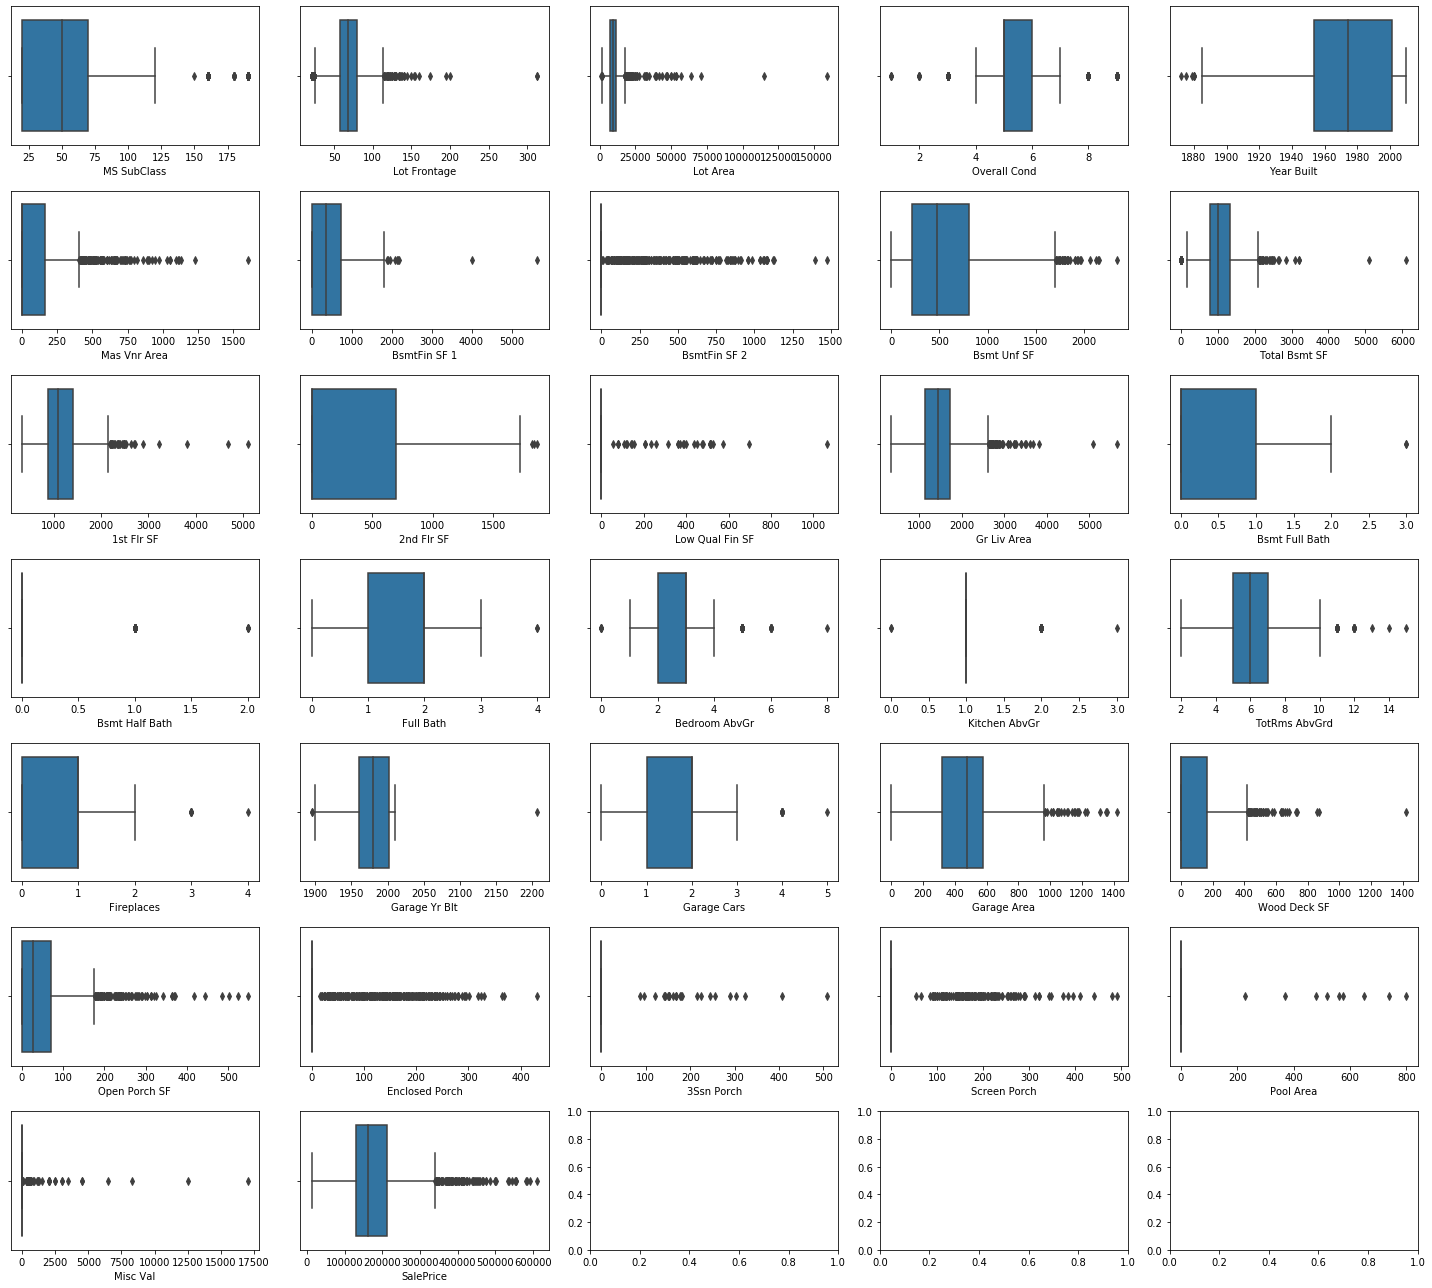

In [34]:
fig, axes = plt.subplots(7,5, figsize=(20,18))

for i, col in enumerate(outlier_variables.columns):
    sns.boxplot(outlier_variables[col], ax=axes[i//5,i%5])
    plt.tight_layout();

**Outliers:** The presence of outliers in several variables can be attributed to the fact that many properties don't have a certain feature, so any properties that do have that feature are outliers in the data. In general, some conclusions that can be made include
- Overall condition of most properties falls in the 4-7 range, but there are some outliers at either end of the spectrum. 
- Only two properties have a basement half bathroom.

The variables with notable outliers include:
- Garage Yr Blt (year 2200)
- Kitchen AbvGr (one property has 3 kitchens above grade)

In [ ]:
# Consider whether discrete values are better represented as categorical or continuous. 
# (Are relationships to the target linear?)

# Data Cleaning


## Clean training data

- Drop columns with 80% or more null (or 0) values: Pool QC, Pool Area, Misc Feature, Misc Val, Alley and Fence.
- Make all column names lowercase

In [ ]:
#df_train.drop(['Pool QC', 'Pool Area', 'Misc Feature', 'Misc Val', 'Alley', 'Fence'], axis=1, inplace=True)

In [ ]:
# Check the shape of the new df
df_train.shape

## Clean test data

# Exploratory Visuals


Text(0.5, 1, 'Correlation Check')

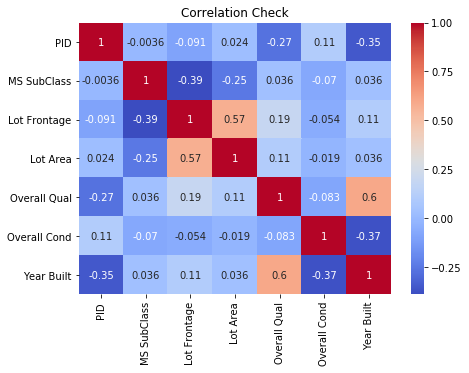

In [49]:
# Look at the correlations between variables

fig, ax = plt.subplots(figsize=(7, 5))

sns.heatmap(df_train.iloc[:,0:20].corr(), annot=True, ax=ax, cmap='coolwarm')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Correlation Check')

/Users/jessicaertel/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jessicaertel/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


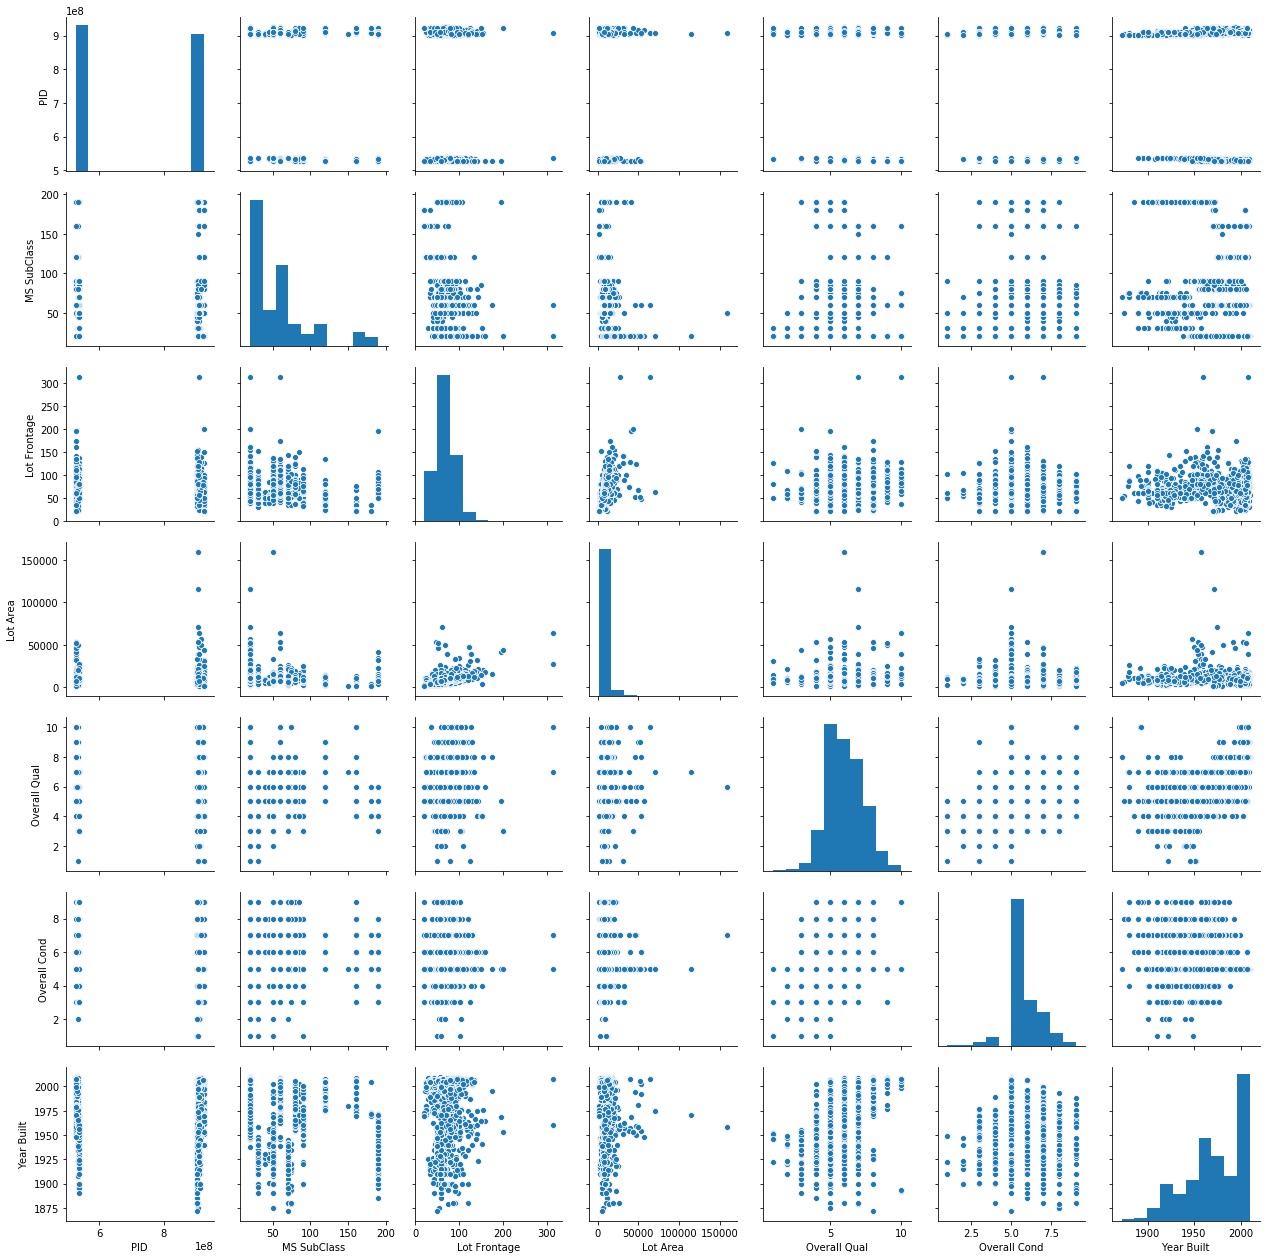

In [44]:
sns.pairplot(df_train.iloc[:,0:20])

# References

Finding Nan Values: https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe

## Preprocessing and Modeling

In [ ]:
# Use "Overall Qual", "Lot Area", "Street" as features
features = 
X = 
y = 

In [ ]:
# Convert the street categories into processable numbers (i.e. turn categories into dummy variables)


In [ ]:
# Train-Test Split


In [ ]:
### Establish a Baseline Model that predicts y_train_mean for EVERYTHING

# Import Package
from sklearn.dummy import DummyRegressor

# Instantiate: creates a skeleton of a model that will always predict the mean of the target
base_mean = DummyRegressor(strategy='mean')

# Fit the (terrible) model
base_mean = base_mean.fit(X_train, y_train)

# Get predictions!
y_hat_base_train = base_mean.predict(X_train)
y_hat_base_test = base_mean.predict(X_test)

# Evaluate: let's use RMSE
print(f'Our train RMSE score for our Baseline Model is: {np.sqrt(mean_squared_error(y_train, y_hat_base_train))}')
print(f'Our test RMSE score for our Baseline Model is: {np.sqrt(mean_squared_error(y_test, y_hat_base_test))}')

**My Actual Model: Linear Regression**

In [ ]:
# Instantiate our linear regression object: 


# Fit our model:


In [ ]:
# What are columns that are fed as input?


In [ ]:
# What is beta_0?


In [ ]:
# What are the rest of our betas?


In [ ]:
# Make Predictions
y_hat_lr_train =   # familiar data
y_hat_lr_test =  # unseen/unfamiliar data

# Get RMSE


# Preparing .csv to submit to Kaggle

In [ ]:
features

In [ ]:
# Create a dataframe of our features from our testing data
X_kaggle = df_test[features]

### WARNING ###
# NEED to apply the feature engineering methods you did above to this X_kaggle dataset too!
# Otherwise, your model won't have the inputs it expects!
X_kaggle = pd.get_dummies(X_kaggle, columns = ["Street"])

In [ ]:
# Make predictions and save those predictions to a new column
X_kaggle['SalePrice'] = lr.predict(X_kaggle)
X_kaggle.head()

In [ ]:
# Create a new dataframe of JUST our predictions
output = X_kaggle[['SalePrice']]
output.head()

In [ ]:
# Saving our predictions to our datasets folder
output.to_csv("./datasets/my_first_submission.csv")